In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the image
img = Image.open('purdue.jpg')

# Convert the image into an array
img_array = np.array(img)

# Separate out the 3 color channels
R = img_array[:, :, 0]
G = img_array[:, :, 1]
B = img_array[:, :, 2]

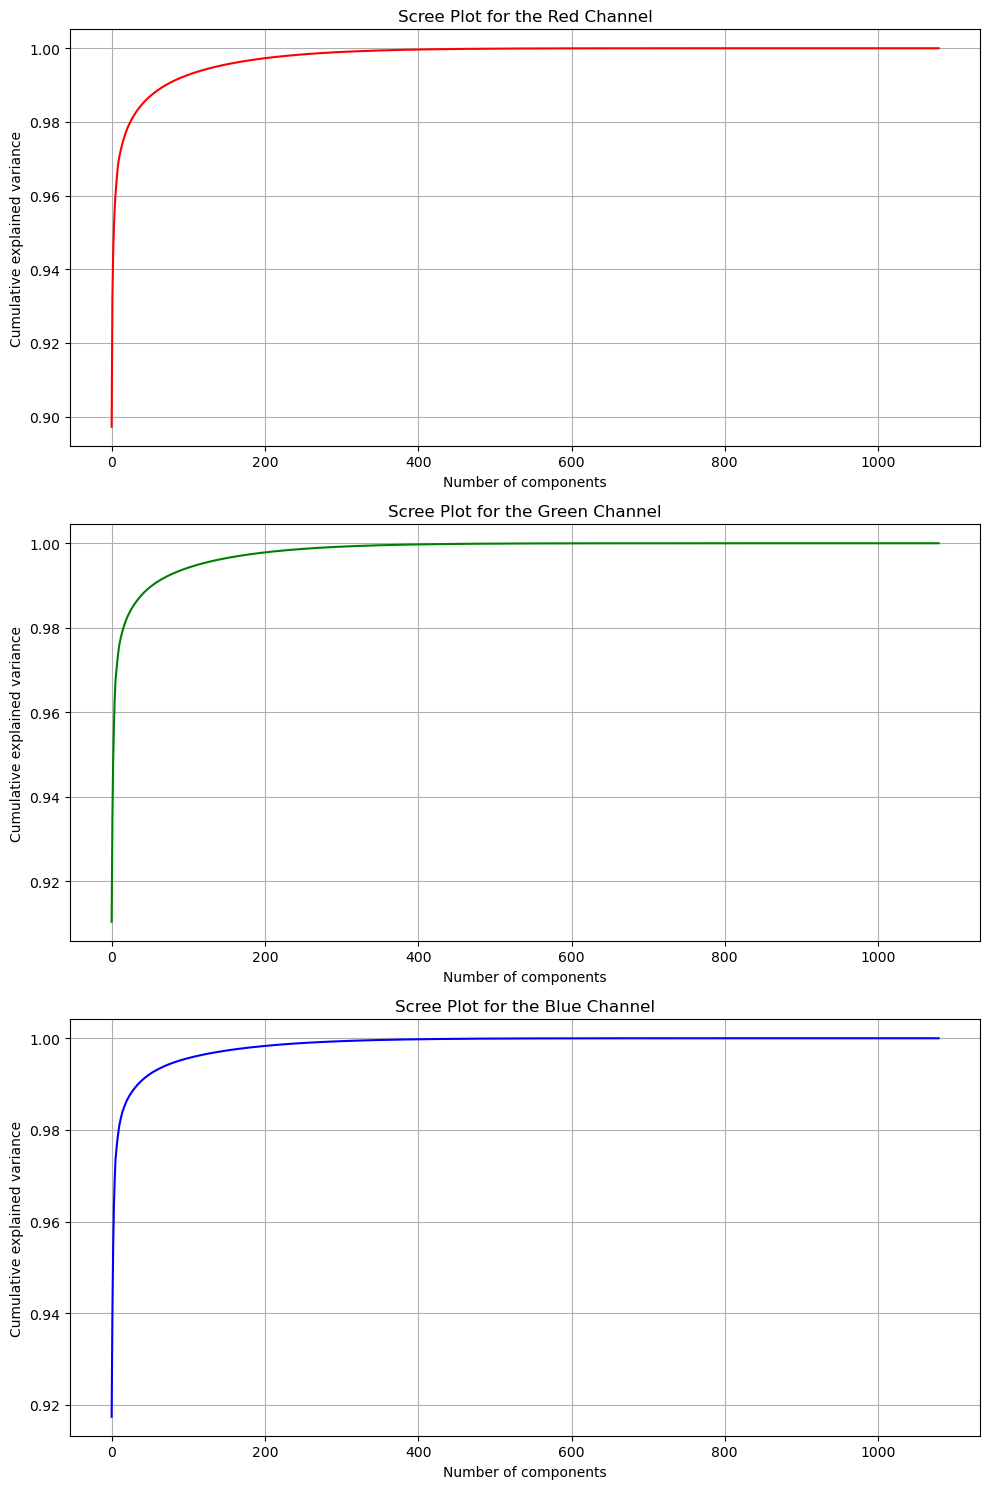

In [5]:
# Perform SVD on each channel
U_R, s_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, s_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, s_B, Vt_B = np.linalg.svd(B, full_matrices=False)

# Plot the scree plot for each channel
def plot_scree(singular_values, color, ax):
    variance_explained = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
    ax.plot(variance_explained, color=color)    
    ax.set_xlabel('Number of components')
    ax.set_ylabel('Cumulative explained variance')
    ax.grid(True)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

plot_scree(s_R, 'red', axs[0])
axs[0].set_title('Scree Plot for the Red Channel')

plot_scree(s_G, 'green', axs[1])
axs[1].set_title('Scree Plot for the Green Channel')

plot_scree(s_B, 'blue', axs[2])
axs[2].set_title('Scree Plot for the Blue Channel')

plt.tight_layout()
plt.show()

In [6]:
# Function to perform SVD on each channel and reconstruct with top k singular values
def compress_svd(U, s, Vt, k):
    S = np.diag(s[:k])
    U = U[:, :k]
    Vt = Vt[:k, :]
    compressed = np.dot(U, np.dot(S, Vt))
    return compressed

# Function to calculate MSE
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)


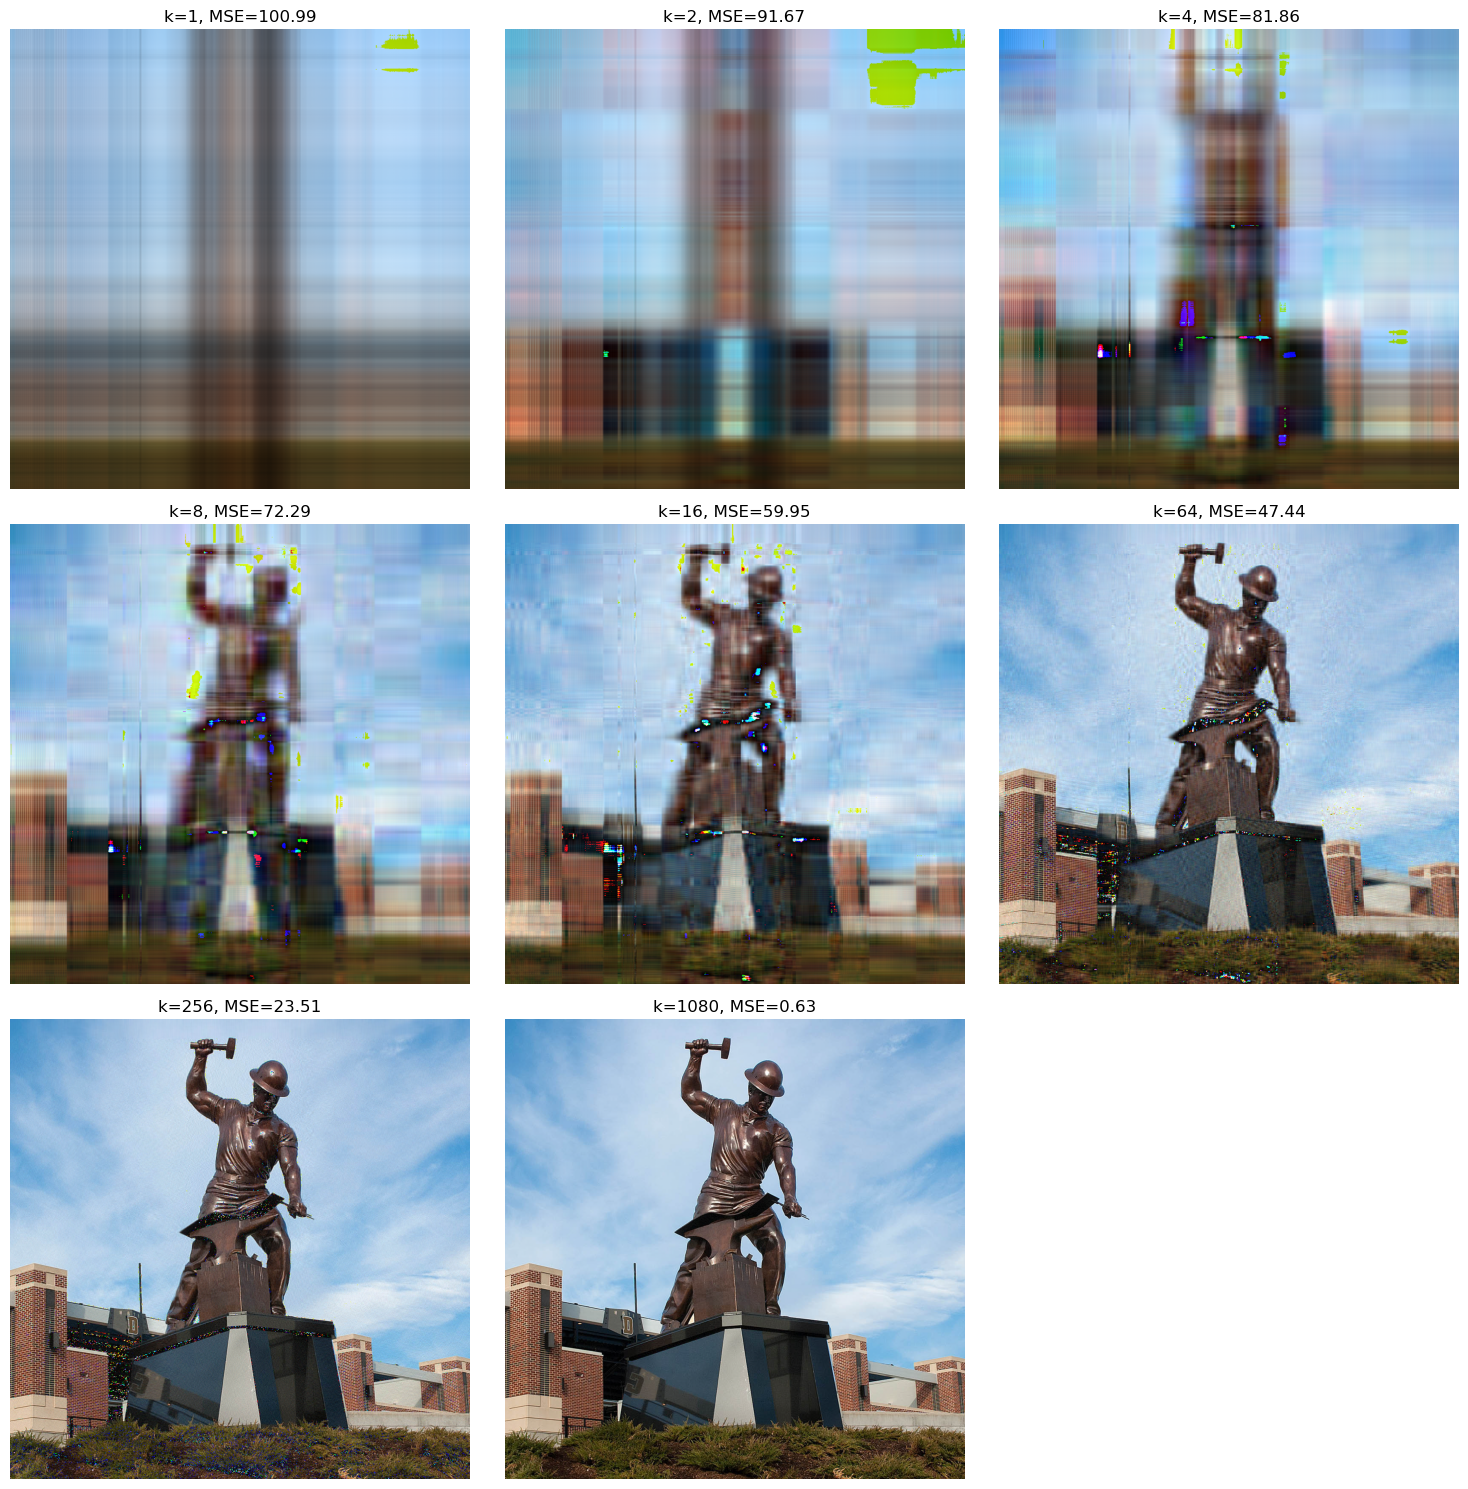

In [10]:
# Values of k to use
ks = [1, 2, 4, 8, 16, 64, 256, 1080]

# Dictionary to hold the compressed images and MSE values
compressed_images = {}
mse_values = {}

# Compress and calculate MSE for each channel and for each k
for k in ks:
    compressed_R = compress_svd(U_R, s_R, Vt_R, k)
    compressed_G = compress_svd(U_G, s_G, Vt_G, k)
    compressed_B = compress_svd(U_B, s_B, Vt_B, k)
    
    # Stack the channels back together
    compressed_image = np.stack((compressed_R, compressed_G, compressed_B), axis=2).astype(np.uint8)
    compressed_images[k] = compressed_image
    
    # Calculate the MSE for the current k
    mse_values[k] = calculate_mse(compressed_images[k], img_array)

# Plot the compressed images
plt.figure(figsize=(15, 15))
for i, k in enumerate(ks):
    plt.subplot(3, 3, i+1)
    plt.imshow(compressed_images[k])
    plt.title(f"k={k}, MSE={mse_values[k]:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()

